In [8]:
import pandas as pd
import uproot
import awkward as ak
import boost_histogram as bh

In [9]:
fname='../CLUE_clusters_single.root' ## with CLUS->LC->rechit mapping
test = uproot.open(fname)["clusters"]
df = test.arrays(library="pd")

In [10]:
#for x in uproot.iterate(fname + ":clusters", step_size="100MB", library="pd"):
#    tree = x
df

,beamEnergy,NRechits,impactX,impactY,rechits_x,rechits_y,rechits_z,rechits_energy,rechits_layer,rechits_rho,...,clus2D_rho,clus2D_delta,clus2D_isSeed,clus3D_x,clus3D_y,clus3D_z,clus3D_energy,clus3D_layer,clus3D_size,clus3D_idxs
0,20.0,317,[-1.301846981048584 -1.4055557250976562 -1.480...,[0.1016683578491211 0.08946585655212402 0.1108...,"[-0.9744873046875, -0.9744873046875, -1.948974...","[-0.5626220703125, 0.5626220703125, 1.12524414...","[13.8774995803833, 13.8774995803833, 13.877499...","[0.030588939785957336, 0.044119659811258316, 0...","[1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, ...","[0.182526633143425, 0.22761034965515137, 0.228...",...,"[1.2547905445098877, 1.9783005714416504, 2.949...","[0.38746681809425354, 0.15936654806137085, 0.1...","[0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, ...","[-2.923339366912842, -1.650612711906433, 1.323...","[3.5616142749786377, 0.12099162489175797, 1.78...","[20.577499389648438, 22.68570327758789, 23.582...","[0.07071459293365479, 15.710233688354492, 0.39...","[-99, -99, -99, -99, -99, -99, -99, -99, -99, ...","[1, 16, 1, 1, 1, 1, 1, 1, 1, 1, 3]","((6), (0, 1, 2, 3, 4, 5, 7, 8, 11, 14, 15, 16,..."
1,20.0,319,[-0.896986722946167 -1.001077651977539 -1.0770...,[5.187577247619629 5.176177024841309 5.1993317...,"[-8.996576070785522e-06, -0.9744873046875, -0....","[2.25048828125, 2.81298828125, 5.0634765625, 2...","[13.8774995803833, 13.8774995803833, 13.877499...","[0.011961563490331173, 0.040663931518793106, 0...","[1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, ...","[0.03229352831840515, 0.04664471372961998, 0.0...",...,"[0.052625495940446854, 0.5352356433868408, 1.0...","[1.9065757989883423, 4.805480102731963e-07, 0....","[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, ...","[-0.6340740919113159, -2.763763189315796, 1.94...","[2.6164910793304443, 0.9343278408050537, 3.739...","[13.8774995803833, 19.687498092651367, 25.6974...","[0.052625495940446854, 0.2509037256240845, 0.0...","[-99, -99, -99, -99, -99, -99, -99, -99, -99]","[1, 1, 1, 17, 1, 1, 2, 1, 2]","((0), (5), (10), (1, 2, 3, 4, 6, 7, 8, 9, 11, ..."
2,20.0,295,[-2.2557623386383057 -2.3599424362182617 -2.43...,[2.779104471206665 2.767007827758789 2.7885847...,"[-1.948974609375, -2.92333984375, -0.974487304...","[2.25048828125, 3.93798828125, 3.93798828125, ...","[13.8774995803833, 13.8774995803833, 14.767499...","[0.04474058747291565, 0.029476160183548927, 0....","[1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, ...","[0.04474058747291565, 0.029476160183548927, 0....",...,"[0.4601607024669647, 0.05426299571990967, 1.10...","[0.5750683546066284, 3.4028234663852886e+38, 0...","[0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, ...","[-1.948974609375, -3.56009578704834, -2.405367...","[5.625975608825684, 0.13751760125160217, 2.492...","[14.767499923706055, 19.687498092651367, 22.96...","[0.05426299571990967, 0.0771235004067421, 16.4...","[-99, -99, -99, -99, -99, -99, -99, -99, -99, ...","[1, 1, 20, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1]","((1), (6), (0, 2, 3, 4, 5, 7, 8, 9, 11, 12, 13..."
3,20.0,279,[-2.2301077842712402 -2.3341400623321533 -2.40...,[2.649895668029785 2.6381213665008545 2.660427...,"[-1.948974609375, -2.92333984375, -1.948974609...","[2.25048828125, 2.81298828125, 3.37548828125, ...","[13.8774995803833, 13.8774995803833, 13.877499...","[0.39945217967033386, 0.028500841930508614, 0....","[1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, ...","[0.4393095374107361, 0.2538338303565979, 0.253...",...,"[2.0554988384246826, 3.6852355003356934, 5.434...","[0.036666374653577805, 0.3626539707183838, 0.1...","[0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, ...","[-2.3588051795959473, 2.234104633331299, -1.94...","[2.4141228199005127, 4.590908050537109, 5.6259...","[19.553104400634766, 23.58249855041504, 25.697...","[16.900753021240234, 0.09852947294712067, 0.08...","[-99, -99, -99, -99, -99, -99, -99, -99, -99, ...","[15, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1]","((0, 1, 2, 3, 4, 5, 6, 7, 11, 12, 14, 16, 20, ..."
4,20.0,276,[-3.529946804046631 -3.63

In [11]:
impact = ak.to_dataframe(test.arrays(filter_name=["impact*"], library="ak"),
        levelname=lambda i : {0 : "event", 1:"layer"}[i])
impact

impactX   impactY
event layer                    
0     0     -1.301847  0.101668
      1     -1.405556  0.089466
      2     -1.480678  0.110803
      3     -1.459117  0.065231
      4     -1.315109  0.109648
...               ...       ...
11603 35    -2.490224 -1.625766
      36    -2.490825 -1.730822
      37    -2.533645 -1.718613
      38    -2.698997 -1.876578
      39    -2.757719 -1.986052

[464160 rows x 2 columns]

In [12]:
rechits = ak.to_dataframe(test.arrays(filter_name=["beamEnergy", "rechits*"], library="ak"), 
    levelname=lambda i : {0 : "event", 1:"rechit_id"}[i])
rechits

beamEnergy  rechits_x  rechits_y  rechits_z  rechits_energy  \
event rechit_id                                                                
0     0                20.0  -0.974487  -0.562622    13.8775        0.030589   
      1                20.0  -0.974487   0.562622    13.8775        0.044120   
      2                20.0  -1.948975   1.125244    13.8775        0.076637   
      3                20.0  -1.948975  -0.000009    13.8775        0.259756   
      4                20.0  -2.923340   2.812988    13.8775        0.036976   
...                     ...        ...        ...        ...             ...   
11603 286              20.0  -0.974487  -3.937988    52.8815        0.060463   
      287              20.0   2.923340  -2.812988    52.8815        0.008682   
      288              20.0  -0.974487  -6.188477    52.8815        0.011615   
      289              20.0   5.846680  -2.250488    52.8815        0.014194   
      290              20.0   4.872070  -3.937988    52.8815        0.013601   

                 rechits_layer  rechits_rho  rechits_delta  rechits_isSeed  
event rechit_id                                                             
0     0                      1     0.182527   1.125237e+00               0  
      1                      1     0.227610   1.125242e+00               0  
      2                      1     0.228574   1.125253e+00               0  
      3                      1     0.335428   3.402823e+38               1  
      4                      1     0.036976   1.948812e+00               0  
...                        ...          ...            ...             ...  
11603 286                   27     0.060463   3.402823e+38               1  
      287                   27     0.008682   2.250150e+00               0  
      288                   27     0.011615   2.250488e+00               0  
      289                   27     0.014194   3.402823e+38               0  
      290                   27     0.013601   1.948723e+00               0  

[2805172 rows x 9 columns]

In [13]:
rechits.reset_index(drop=True).rechits_layer.value_counts().sort_index()
rechits.rechits_energy.max()

6.115352630615234

In [14]:
rechits.groupby(level=0).rechits_energy.sum()

event
0        18.014973
1        18.059782
2        18.055521
3        19.153255
4        17.042166
           ...    
11599    17.091753
11600    16.267965
11601    18.769497
11602    17.110174
11603    20.534357
Name: rechits_energy, Length: 11604, dtype: float32

In [15]:
clusters_2d = ak.to_dataframe(test.arrays(filter_name=["beamEnergy", "clus2D*"], library="ak"), 
    levelname=lambda i : {0 : "event", 1:"clus2D_id", 2:"hit_id"}[i])
clusters_2d

beamEnergy  clus2D_x  clus2D_y   clus2D_z  \
event clus2D_id hit_id                                              
0     0         0             20.0 -1.867480  0.558911  13.877500   
                1             20.0 -1.867480  0.558911  13.877500   
                2             20.0 -1.867480  0.558911  13.877500   
                3             20.0 -1.867480  0.558911  13.877500   
                4             20.0 -1.867480  0.558911  13.877500   
...                            ...       ...       ...        ...   
11603 34        3             20.0 -2.018789  0.147382  46.412498   
      35        0             20.0 -2.923340  3.937988  46.412498   
      36        0             20.0 -0.000009  1.125244  52.881500   
      37        0             20.0 -0.974487 -4.574578  52.881500   
                1             20.0 -0.974487 -4.574578  52.881500   

                        clus2D_energy  clus2D_layer  clus2D_size  clus2D_idxs  \
event clus2D_id hit_id                                                          
0     0         0            0.448077             1            5            0   
                1            0.448077             1            5            1   
                2            0.448077             1            5            2   
                3            0.448077             1            5            3   
                4            0.448077             1            5            4   
...                               ...           ...          ...          ...   
11603 34        3            0.096182            23            4          281   
      35        0            0.062449            23            1          279   
      36        0            0.111305            27            1          285   
      37        0            0.072079            27            2          286   
                1            0.072079            27            2          288   

                        clus2D_rho  clus2D_delta  clus2D_isSeed  
event clus2D_id hit_id                                           
0     0         0         1.254791  3.874668e-01              0  
                1         1.254791  3.874668e-01              0  
                2         1.254791  3.874668e-01              0  
                3         1.254791  3.874668e-01              0  
                4         1.254791  3.874668e-01              0  
...                            ...           ...            ...  
11603 34        3         0.096182  3.402823e+38              1  
      35        0         0.062449  1.927641e+00              1  
      36        0         0.111305  3.402823e+38              1  
      37        0         0.072079  3.402823e+38              1  
                1         0.072079  3.402823e+38              1  

[2466546 rows x 11 columns]

<AxesSubplot: >

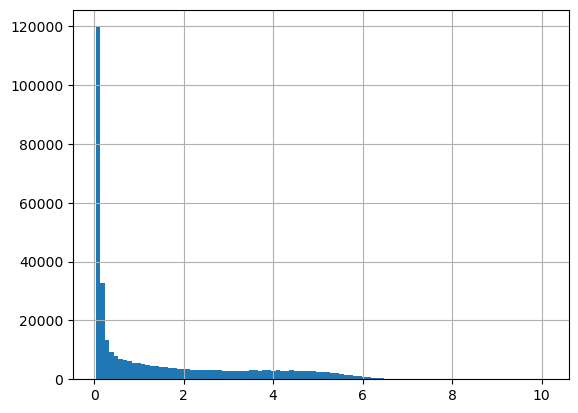

In [16]:
clusters_2d_nohits = clusters_2d.loc[(slice(None), slice(None), 0)] #remove hits by slicing and taking first hit
clusters_2d_nohits.clus2D_rho.reset_index().clus2D_rho.hist(bins=100)


In [17]:
clusters_2d.loc[(slice(None), slice(None), 0)].reset_index(drop=True)

,beamEnergy,clus2D_x,clus2D_y,clus2D_z,clus2D_energy,clus2D_layer,clus2D_size,clus2D_idxs,clus2D_rho,clus2D_delta,clus2D_isSeed
0,20.0,-1.867480,0.558911,13.877500,0.448077,1,5,0,1.254791,3.874668e-01,0
1,20.0,-1.652880,-0.064618,14.767500,0.684047,2,6,5,1.978301,1.593665e-01,0
2,20.0,-1.869435,0.171449,16.782499,0.929381,3,10,13,2.949999,1.610287e-01,0
3,20.0,-1.758617,0.054618,17.672501,1.211050,4,7,23,3.599792,2.032689e-01,0
4,20.0,-1.470317,0.404698,19.687500,1.698063,5,20,32,4.728813,3.021839e-01,0
...,...,...,...,...,...,...,...,...,...,...,...
364446,20.0,-0.398342,2.480419,46.412498,0.079123,23,2,275,0.079123,1.586731e+00,1
364447,20.0,-2.018789,0.147382,46.412498,0.096182,23,4,277,0.096182,3.402823e+38,1
364448,20.0,-2.923340,3.937988,46.412498,0.062449,23,1,279,0.062449,1.927641e+00,1
364449,20.0,-0.000009,1.125244,52.881500,0.111305,27,1,285,0.111305,3.402823e+38,1


<AxesSubplot: >

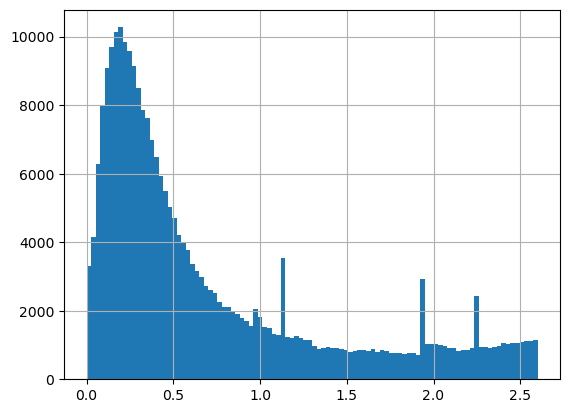

In [18]:
delta_series = clusters_2d_nohits.clus2D_delta.reset_index().clus2D_delta
delta_series[delta_series<1e35].hist(bins=100)

<AxesSubplot: xlabel='clus2D_delta', ylabel='clus2D_rho'>

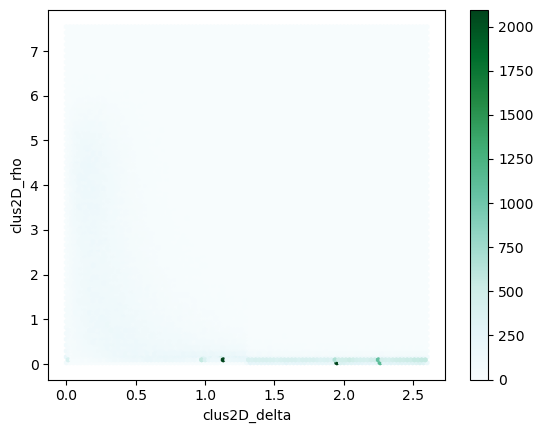

In [19]:
clusters_2d_nohits[clusters_2d_nohits["clus2D_delta"]<1e35].plot(x="clus2D_delta", y="clus2D_rho", kind="hexbin")

In [20]:
beamEnergies = [20, 50, 80, 100, 120, 150, 200, 250, 300]
beamEnergiesAxis = bh.axis.IntCategory(beamEnergies)
rho_axis = bh.axis.Regular(bins=100, start=0, stop=10.)
delta_axis = bh.axis.Regular(bins=100, start=0, stop=3.)
h_2Dcluster_rho_delta = bh.Histogram(beamEnergiesAxis, rho_axis, delta_axis)

In [21]:
clusters2D_slice = clusters_2d.loc[(slice(None), slice(None), 0)].reset_index(drop=True)
h_2Dcluster_rho_delta.fill(clusters2D_slice.beamEnergy, clusters2D_slice.clus2D_rho, clusters2D_slice.clus2D_delta)
h_2Dcluster_rho_delta.project(0, 1)[bh.loc(20), :].view()


array([9.5569e+04, 5.0293e+04, 1.6455e+04, 1.0110e+04, 8.2980e+03,
       7.2300e+03, 6.7250e+03, 6.1940e+03, 5.7610e+03, 5.4070e+03,
       5.1150e+03, 4.9660e+03, 4.6130e+03, 4.3200e+03, 4.1580e+03,
       4.0920e+03, 3.8440e+03, 3.6890e+03, 3.7050e+03, 3.5170e+03,
       3.4800e+03, 3.2630e+03, 3.2200e+03, 3.1300e+03, 3.0830e+03,
       3.1400e+03, 3.0330e+03, 3.0830e+03, 2.9480e+03, 2.9810e+03,
       2.8840e+03, 2.9040e+03, 2.8040e+03, 3.0010e+03, 3.0430e+03,
       2.9780e+03, 2.8700e+03, 2.9790e+03, 3.0500e+03, 2.9230e+03,
       2.9330e+03, 2.9490e+03, 2.9600e+03, 2.9560e+03, 3.0680e+03,
       2.9800e+03, 2.8250e+03, 2.7460e+03, 2.7130e+03, 2.6530e+03,
       2.4930e+03, 2.3780e+03, 2.2110e+03, 2.0590e+03, 1.8810e+03,
       1.6550e+03, 1.5240e+03, 1.3140e+03, 1.1670e+03, 9.2100e+02,
       7.8000e+02, 5.9300e+02, 4.3900e+02, 3.6800e+02, 2.8100e+02,
       1.9300e+02, 1.5500e+02, 1.2600e+02, 8.8000e+01, 5.9000e+01,
       3.7000e+01, 2.6000e+01, 2.6000e+01, 8.0000e+00, 1.0000e

In [22]:
clusters_3d = ak.to_dataframe(test.arrays(filter_name="clus3D*", library="ak"), 
    levelname=lambda i : {0 : "event", 1:"clus3D_id", 2:"hit_id"}[i])
clusters_3d

clus3D_x  clus3D_y   clus3D_z  clus3D_energy  \
event clus3D_id hit_id                                                 
0     0         0      -2.923339  3.561614  20.577499       0.070715   
      1         0      -1.650613  0.120992  22.685703      15.710234   
                1      -1.650613  0.120992  22.685703      15.710234   
                2      -1.650613  0.120992  22.685703      15.710234   
                3      -1.650613  0.120992  22.685703      15.710234   
...                          ...       ...        ...            ...   
11603 13        0      -0.398342  2.480419  46.412498       0.079123   
      14        0      -2.018789  0.147382  46.412498       0.096182   
      15        0      -2.923340  3.937988  46.412498       0.062449   
      16        0      -0.000009  1.125244  52.881496       0.111305   
      17        0      -0.974487 -4.574578  52.881496       0.072079   

                        clus3D_layer  clus3D_size  clus3D_idxs  
event clus3D_id hit_id                                          
0     0         0                -99            1            6  
      1         0                -99           16            0  
                1                -99           16            1  
                2                -99           16            2  
                3                -99           16            3  
...                              ...          ...          ...  
11603 13        0                -99            1           33  
      14        0                -99            1           34  
      15        0                -99            1           35  
      16        0                -99            1           36  
      17        0                -99            1           37  

[364349 rows x 7 columns]

In [23]:
clusters_3d.loc[(slice(None), slice(None), 0)].reset_index(drop=True)

,clus3D_x,clus3D_y,clus3D_z,clus3D_energy,clus3D_layer,clus3D_size,clus3D_idxs
0,-2.923339,3.561614,20.577499,0.070715,-99,1,6
1,-1.650613,0.120992,22.685703,15.710234,-99,16,0
2,1.323156,1.785223,23.582499,0.397826,-99,1,9
3,-1.250190,-3.866243,25.697498,0.176012,-99,1,10
4,-3.897949,-3.996408,25.697498,0.080068,-99,1,12
...,...,...,...,...,...,...,...
151210,-0.398342,2.480419,46.412498,0.079123,-99,1,33
151211,-2.018789,0.147382,46.412498,0.096182,-99,1,34
151212,-2.923340,3.937988,46.412498,0.062449,-99,1,35
151213,-0.000009,1.125244,52.881496,0.111305,-99,1,36


In [61]:
clusters_3d

clus3D_x  clus3D_y   clus3D_z  clus3D_energy  \
event clus3D_id hit_id                                                 
0     0         0      -2.923339  3.561614  20.577499       0.070715   
      1         0      -1.650613  0.120992  22.685703      15.710234   
                1      -1.650613  0.120992  22.685703      15.710234   
                2      -1.650613  0.120992  22.685703      15.710234   
                3      -1.650613  0.120992  22.685703      15.710234   
...                          ...       ...        ...            ...   
11603 13        0      -0.398342  2.480419  46.412498       0.079123   
      14        0      -2.018789  0.147382  46.412498       0.096182   
      15        0      -2.923340  3.937988  46.412498       0.062449   
      16        0      -0.000009  1.125244  52.881496       0.111305   
      17        0      -0.974487 -4.574578  52.881496       0.072079   

                        clus3D_layer  clus3D_size  clus3D_idxs  
event clus3D_id hit_id                                          
0     0         0                -99            1            6  
      1         0                -99           16            0  
                1                -99           16            1  
                2                -99           16            2  
                3                -99           16            3  
...                              ...          ...          ...  
11603 13        0                -99            1           33  
      14        0                -99            1           34  
      15        0                -99            1           35  
      16        0                -99            1           36  
      17        0                -99            1           37  

[364349 rows x 7 columns]

In [27]:
clusters_2d_nohits

beamEnergy  clus2D_x  clus2D_y   clus2D_z  clus2D_energy  \
event clus2D_id                                                             
0     0                20.0 -1.867480  0.558911  13.877500       0.448077   
      1                20.0 -1.652880 -0.064618  14.767500       0.684047   
      2                20.0 -1.869435  0.171449  16.782499       0.929381   
      3                20.0 -1.758617  0.054618  17.672501       1.211050   
      4                20.0 -1.470317  0.404698  19.687500       1.698063   
...                     ...       ...       ...        ...            ...   
11603 33               20.0 -0.398342  2.480419  46.412498       0.079123   
      34               20.0 -2.018789  0.147382  46.412498       0.096182   
      35               20.0 -2.923340  3.937988  46.412498       0.062449   
      36               20.0 -0.000009  1.125244  52.881500       0.111305   
      37               20.0 -0.974487 -4.574578  52.881500       0.072079   

                 clus2D_layer  clus2D_size  clus2D_idxs  clus2D_rho  \
event clus2D_id                                                       
0     0                     1            5            0    1.254791   
      1                     2            6            5    1.978301   
      2                     3           10           13    2.949999   
      3                     4            7           23    3.599792   
      4                     5           20           32    4.728813   
...                       ...          ...          ...         ...   
11603 33                   23            2          275    0.079123   
      34                   23            4          277    0.096182   
      35                   23            1          279    0.062449   
      36                   27            1          285    0.111305   
      37                   27            2          286    0.072079   

                 clus2D_delta  clus2D_isSeed  
event clus2D_id                               
0     0          3.874668e-01              0  
      1          1.593665e-01              0  
      2          1.610287e-01              0  
      3          2.032689e-01              0  
      4          3.021839e-01              0  
...                       ...            ...  
11603 33         1.586731e+00              1  
      34         3.402823e+38              1  
      35         1.927641e+00              1  
      36         3.402823e+38              1  
      37         3.402823e+38              1  

[364451 rows x 11 columns]

In [60]:
clusters_3D_2D = pd.merge(
    clusters_3d.reset_index(level=("clus3D_id", "hit_id"), names=["event", "clus3D_id", "clus3D_hit_id"]),
    clusters_2d_nohits.reset_index(level="event"),
    how='inner',
    left_on=('event', 'clus3D_idxs'),
    right_on=('event', 'clus2D_id'),
   suffixes=('', '_clus2d')
)
clusters_3D_2D

,event,clus3D_id,clus3D_hit_id,clus3D_x,clus3D_y,clus3D_z,clus3D_energy,clus3D_layer,clus3D_size,clus3D_idxs,...,clus2D_x,clus2D_y,clus2D_z,clus2D_energy,clus2D_layer,clus2D_size,clus2D_idxs,clus2D_rho,clus2D_delta,clus2D_isSeed
0,0,0,0,-2.923339,3.561614,20.577499,0.070715,-99,1,6,...,-2.923340,3.561614,20.577499,0.070715,6,2,58,0.070715,3.402823e+38,1
1,0,1,0,-1.650613,0.120992,22.685703,15.710234,-99,16,0,...,-1.867480,0.558911,13.877500,0.448077,1,5,0,1.254791,3.874668e-01,0
2,0,1,1,-1.650613,0.120992,22.685703,15.710234,-99,16,1,...,-1.652880,-0.064618,14.767500,0.684047,2,6,5,1.978301,1.593665e-01,0
3,0,1,2,-1.650613,0.120992,22.685703,15.710234,-99,16,2,...,-1.869435,0.171449,16.782499,0.929381,3,10,13,2.949999,1.610287e-01,0
4,0,1,3,-1.650613,0.120992,22.685703,15.710234,-99,16,3,...,-1.758617,0.054618,17.672501,1.211050,4,7,23,3.599792,2.032689e-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364344,11603,13,0,-0.398342,2.480419,46.412498,0.079123,-99,1,33,...,-0.398342,2.480419,46.412498,0.079123,23,2,275,0.079123,1.586731e+00,1
364345,11603,14,0,-2.018789,0.147382,46.412498,0.096182,-99,1,34,...,-2.018789,0.147382,46.412498,0.096182,23,4,277,0.096182,3.402823e+38,1
364346,11603,15,0,-2.923340,3.937988,46.412498,0.062449,-99,1,35,...,-2.923340,3.937988,46.412498,0.062449,23,1,279,0.062449,1.927641e+00,1
364347,11603,16,0,-0.000009,1.125244,52.881496,0.111305,-99,1,36,...,-0.000009,1.125244,52.881500,0.111305,27,1,285,0.111305,3.402823e+38,1


In [41]:
impact

impactX   impactY
event layer                    
0     0     -1.301847  0.101668
      1     -1.405556  0.089466
      2     -1.480678  0.110803
      3     -1.459117  0.065231
      4     -1.315109  0.109648
...               ...       ...
11603 35    -2.490224 -1.625766
      36    -2.490825 -1.730822
      37    -2.533645 -1.718613
      38    -2.698997 -1.876578
      39    -2.757719 -1.986052

[464160 rows x 2 columns]

In [55]:
clusters_3D_2D_layer = pd.merge(
    clusters_3D_2D,
    impact, 
    left_on=("event", "clus2D_layer"),
    right_on=("event", "layer")
)
clusters_3D_2D_layer["beamEnergy"]

0         20.0
1         20.0
2         20.0
3         20.0
4         20.0
          ... 
364344    20.0
364345    20.0
364346    20.0
364347    20.0
364348    20.0
Name: beamEnergy, Length: 364349, dtype: float32

In [50]:
clusters_3D_2D_layer["diff_x"] = clusters_3D_2D_layer["clus2D_x"] - clusters_3D_2D_layer["impactX"]
clusters_3D_2D_layer[["event", "clus3D_id", "clus3D_hit_id", "clus2D_x", "clus2D_energy", "impactX", "diff_x"]]

,event,clus3D_id,clus3D_hit_id,clus2D_x,clus2D_energy,impactX,diff_x
0,0,0,0,-2.923340,0.070715,-1.551337,-1.372002
1,0,1,5,-1.565442,1.465993,-1.551337,-0.014105
2,0,1,0,-1.867480,0.448077,-1.405556,-0.461924
3,0,1,1,-1.652880,0.684047,-1.480678,-0.172202
4,0,1,2,-1.869435,0.929381,-1.459117,-0.410319
...,...,...,...,...,...,...,...
364344,11603,13,0,-0.398342,0.079123,-1.195111,0.796769
364345,11603,14,0,-2.018789,0.096182,-1.195111,-0.823677
364346,11603,15,0,-2.923340,0.062449,-1.195111,-1.728229
364347,11603,16,0,-0.000009,0.111305,-1.168610,1.168601
